## Importing

We need to import the necessary libraries and dataset for the project.

In [1]:
# import libraries
import pandas as pd
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
# import database using pandas.read_csv method
df = pd.read_csv('cardio_train.csv', sep=';')

## Exploratory Analysis

In [3]:
# check df to see if imported correctly
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


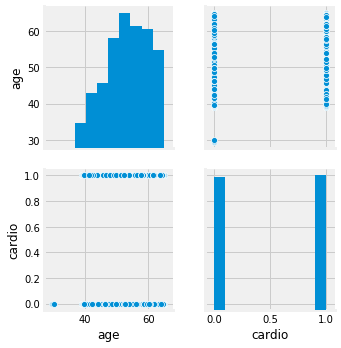

In [37]:
sns.pairplot(df[['age', 'cardio']]);

Observations:
* No null values within the entire dataset. Additionally, per Kaggle description, confirmed no null values from owner.
* 13 total columns:
    * id (primary key)
    * age (days)
    * gender (1 = Female, 2 = Male)
    * height (cm)
    * weight (kg)
    * ap_hi (systolic blood pressure)
    * ap_low (diastolic blood pressure)
    * cholesterol (1 = normal, 2 = above normal, 3 = well above normal)
    * gluc(glucose) (1 = normal, 2 = above normal, 3 = well above normal)
    * smoke (0 = No, 1 = Yes)
    * alco(alcohol) (0 = No, 1 = Yes)
    * active (0 = No, 1 = Yes)
    * cardio(cardiovasular disease) (0 = Does not have disease, 1 = Has disease)
* There are more females than males in this dataset.
* Overall, there are less people who smoke and drink alcohol and more people who are active.
* Around half of the population have cardiovascular disease.
* ap_hi, ap_low columns, weight, height have abnormal min and max values. possible that we need to delete these rows if not many affected.

## Data Cleaning

Check for Missing Values

In [6]:
# finding any NA or missing values in the dataset
# no NA or missing values found
df.isnull().values.any()

False

Converting Age from Day to Year

In [7]:
# converting the age column from day (d) to year (yr)
# 365 d = 1 yr
# we did not account for leap years as it would not affect the true age in a meaningful way
df.age = df.age / 365

In [8]:
# preview changes made in age column
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


Converting Weight from Kilogram to Pound

In [9]:
# converting the weight column from kilogram (kg) to pound (lb)
# 1 kg  = 2.2046 lb
df.weight = df.weight * 2.2046

In [10]:
# preview changes made in weight column
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,136.6852,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,187.3910,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,141.0944,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,180.7772,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,123.4576,100,60,1,1,0,0,0,0


Converting Height from Centimeter to Inch

In [11]:
# converting the height column from centimeter (cm) to inch (in)
# 1 cm = 0.393701 in
df.height = df.height * 0.393701

In [12]:
# preview changes made in height column
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,66.141768,136.6852,110,80,1,1,0,0,1,0
1,1,55.419178,1,61.417356,187.3910,140,90,3,1,0,0,1,1
2,2,51.663014,1,64.960665,141.0944,130,70,3,1,0,0,0,1
3,3,48.282192,2,66.535469,180.7772,150,100,1,1,0,0,1,1
4,4,47.873973,1,61.417356,123.4576,100,60,1,1,0,0,0,0


In [13]:
df.sort_values('weight')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
57858,82567,51.517808,2,64.960665,22.04600,180,1100,2,2,0,0,1,1
33817,48318,59.128767,2,70.078778,24.25060,130,90,1,1,0,0,1,1
60188,85931,59.876712,1,63.779562,46.29660,120,80,2,1,0,0,1,1
29488,42156,55.912329,2,69.685077,48.50120,120,80,1,1,1,1,1,0
26806,38312,63.791781,1,61.811057,50.70580,110,80,1,1,0,0,1,0
34276,48976,40.175342,2,50.393728,61.72880,120,80,1,1,0,0,1,0
60699,86650,51.712329,1,67.322871,63.93340,110,70,2,1,0,0,1,1
41905,59853,58.449315,1,56.299243,66.13800,103,61,2,1,0,0,1,0
3752,5306,42.191781,1,47.244120,66.13800,110,70,1,1,0,0,1,0
18559,26503,49.698630,1,62.992160,66.13800,120,80,1,1,0,0,1,1


Removing Outliers for Abnormal Values

In [14]:
# removing weights and heights that fall below 2.5% or above 97.5% of a given range
df.drop(df[(df['height'] > 82) | (df['height'] < 58)].index,inplace=True)
df.drop(df[(df['weight'] > 300) | (df['weight'] < 120)].index,inplace=True)

In [16]:
# removing ap_hi and ap_lo that fall below 2.5% or above 97.5% of a given range
df.drop(df[(df['ap_hi'] > 200) | (df['ap_hi'] < 90)].index,inplace=True)
df.drop(df[(df['ap_lo'] > 120) | (df['ap_lo'] < 60)].index,inplace=True)

In [19]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,66.141768,136.6852,110,80,1,1,0,0,1,0
1,1,55.419178,1,61.417356,187.3910,140,90,3,1,0,0,1,1
2,2,51.663014,1,64.960665,141.0944,130,70,3,1,0,0,0,1
3,3,48.282192,2,66.535469,180.7772,150,100,1,1,0,0,1,1
4,4,47.873973,1,61.417356,123.4576,100,60,1,1,0,0,0,0


## Feature Engineering

We are feature engineering two new columns:
* blood_pressure: (0 = not high blood pressure, 1 = high blood pressure)
* BMI: is an estimate of body fat and a good measure of your patients' risk for diseases that can occur with overweight and obesity. calculated by $kg/meters^2$
    * If your BMI is **less than 18.5**, it falls within the **underweight** range.
    * If your BMI is **18.5 to <25**, it falls within the **normal**.
    * If your BMI is **25.0 to <30**, it falls within the **overweight** range.
    * If your BMI is **30.0 or higher**, it falls within the **obese** range.

In [30]:
# calculating BMI with formula: kg / meters^2

# convert weight from lb to kg
kg = (df.weight/2.2046)

# convert height from in to cm
cm = (df.height/0.393701)

# convert height from cm to m
m = cm * 0.01

# plug values into formula and set it equal to a new column, BMI
df['BMI'] = kg/m**2

In [32]:
# preview new column made
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.391781,2,66.141768,136.6852,110,80,1,1,0,0,1,0,21.967120
1,1,55.419178,1,61.417356,187.3910,140,90,3,1,0,0,1,1,34.927679
2,2,51.663014,1,64.960665,141.0944,130,70,3,1,0,0,0,1,23.507805
3,3,48.282192,2,66.535469,180.7772,150,100,1,1,0,0,1,1,28.710479
4,4,47.873973,1,61.417356,123.4576,100,60,1,1,0,0,0,0,23.011177


In [ ]:
df.applymap(lambda: df['blood_if ) 
if df.ap_hi < 130 and df.ap_lo < 80:
    df['blood_pressure'] == 0
else:
    df['blood_pressure'] == 1